# CUSTOMER SEGMENTATION

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
mall = pd.read_csv("C:\\Users\\bangarraju\\Downloads\Mall_Customers.csv")

In [3]:
mall

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
mall.rename(columns={'Genre':'Gender'},inplace=True)

In [5]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
mall.shape

(200, 5)

In [7]:
mall.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
mall.drop(['CustomerID'],axis=1,inplace=True)

In [10]:
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [11]:
import warnings
warnings.filterwarnings("ignore")

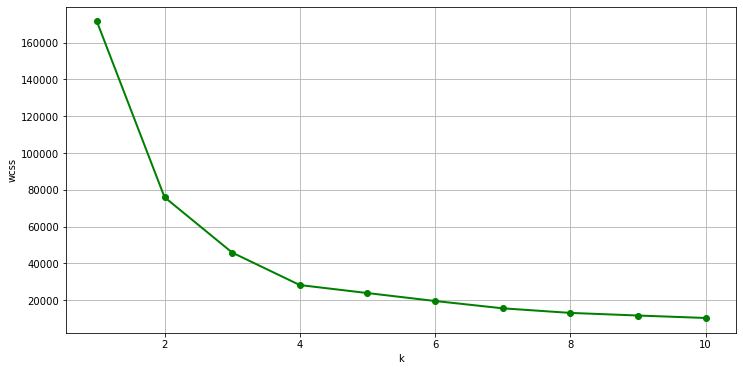

In [12]:
X1=mall.loc[:,['Age',"Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth =2,color = 'green',marker='o')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X1)


In [14]:
print(labels)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [15]:
labels.shape

(200,)

In [16]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


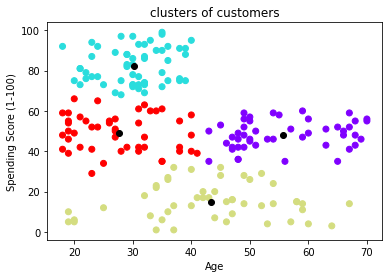

In [17]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [18]:
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


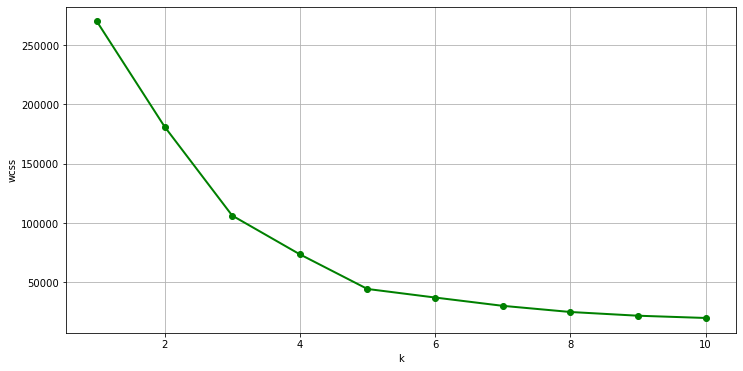

In [19]:
X2=mall.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth =2,color = 'green',marker='o')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

In [20]:
kmeans =KMeans(n_clusters=5)
labels = kmeans.fit_predict(X2)

In [21]:
print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [22]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

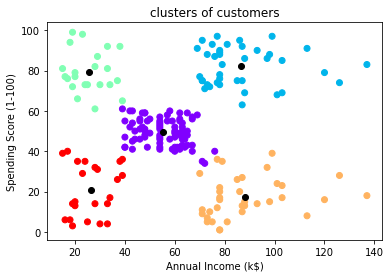

In [23]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('clusters of customers')
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.show()

In [24]:
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [25]:
mall.iloc[:,1:]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


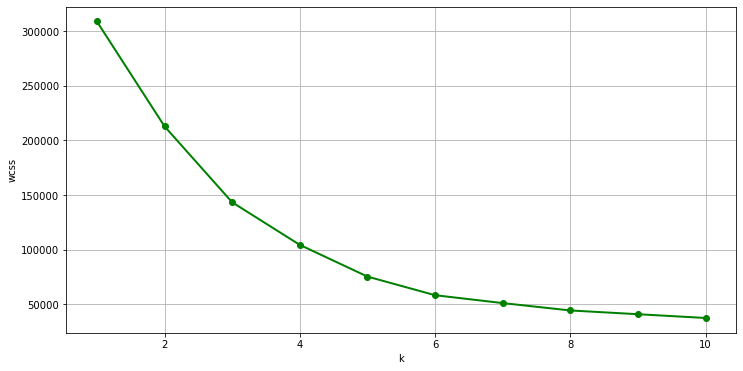

In [26]:
X3=mall.iloc[:,1:]
from sklearn.cluster import KMeans
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth =2,color = 'green',marker='o')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

In [40]:
kmean =KMeans(n_clusters=5)
lab = kmean.fit_predict(X3)

In [41]:
print(lab)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [42]:
kmean.cluster_centers_

array([[32.69230769, 86.53846154, 82.12820513],
       [43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333],
       [45.2173913 , 26.30434783, 20.91304348],
       [25.52173913, 26.30434783, 78.56521739]])

In [44]:
lab = kmean.fit_predict(X3)
mall['labesl']=lab

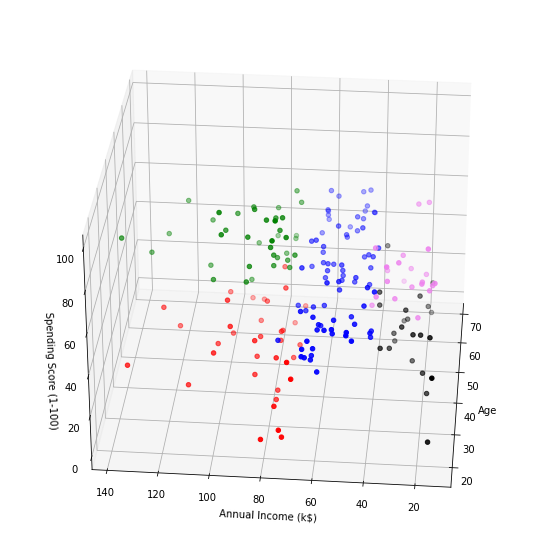

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection ='3d')
ax.scatter(mall.Age[mall.labesl == 0],mall['Annual Income (k$)'][mall.labesl == 0],mall['Spending Score (1-100)'][mall.labesl == 0],c='blue')
ax.scatter(mall.Age[mall.labesl == 1],mall['Annual Income (k$)'][mall.labesl == 1],mall['Spending Score (1-100)'][mall.labesl == 1],c='red')
ax.scatter(mall.Age[mall.labesl == 2],mall['Annual Income (k$)'][mall.labesl == 2],mall['Spending Score (1-100)'][mall.labesl == 2],c='violet')
ax.scatter(mall.Age[mall.labesl == 3],mall['Annual Income (k$)'][mall.labesl == 3],mall['Spending Score (1-100)'][mall.labesl == 3],c='black')
ax.scatter(mall.Age[mall.labesl == 4],mall['Annual Income (k$)'][mall.labesl == 4],mall['Spending Score (1-100)'][mall.labesl == 4],c='green')
ax.view_init(30,185)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel("Spending Score (1-100)")
plt.show()

# Image segmentation using KMean clustering

In [129]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [132]:
photo = imread('C:\\Users\\bangarraju\\Pictures\\Raina-Dhoni-IPL-BCCI-PHoto (1).jpg')

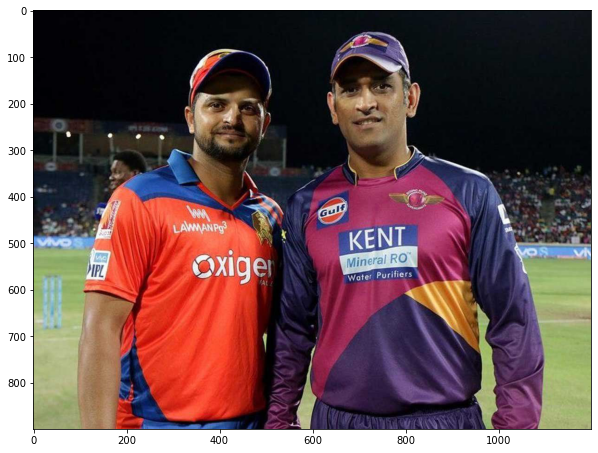

In [133]:
plt.figure(figsize=(10,25))
plt.imshow(photo)

In [134]:
photo 

array([[[  2,   1,   6],
        [  2,   1,   6],
        [  2,   1,   6],
        ...,
        [ 17,  20,  27],
        [ 17,  20,  27],
        [ 17,  20,  27]],

       [[  2,   1,   6],
        [  2,   1,   6],
        [  2,   1,   6],
        ...,
        [ 17,  20,  27],
        [ 17,  20,  27],
        [ 17,  20,  27]],

       [[  2,   1,   6],
        [  2,   1,   6],
        [  2,   1,   6],
        ...,
        [ 17,  20,  27],
        [ 17,  20,  27],
        [ 17,  20,  27]],

       ...,

       [[154, 163, 110],
        [154, 163, 110],
        [153, 162, 109],
        ...,
        [166, 175, 122],
        [165, 174, 121],
        [159, 168, 115]],

       [[154, 163, 110],
        [154, 163, 110],
        [153, 162, 109],
        ...,
        [165, 174, 121],
        [164, 173, 120],
        [159, 168, 115]],

       [[154, 163, 110],
        [154, 163, 110],
        [153, 162, 109],
        ...,
        [163, 172, 119],
        [163, 172, 119],
        [159, 168, 115]]

In [135]:
photo = photo/255.0

In [136]:
photo.shape

(900, 1200, 3)

In [137]:
X4=photo.reshape(-1,3)

In [138]:
X4.shape

(1080000, 3)

In [142]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)

In [143]:
lab = kmean.fit_predict(X4)

In [144]:
lab

array([1, 1, 1, ..., 0, 0, 0])

In [145]:
kmean.cluster_centers_

array([[0.62183492, 0.61944632, 0.54138107],
       [0.1069033 , 0.08768233, 0.13414673],
       [0.74498179, 0.25616178, 0.23902848]])

In [146]:
kmean.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [147]:
image_seg = kmean.cluster_centers_

In [148]:
image_seg = image_seg[kmean.labels_]

In [149]:
image_seg 

array([[0.1069033 , 0.08768233, 0.13414673],
       [0.1069033 , 0.08768233, 0.13414673],
       [0.1069033 , 0.08768233, 0.13414673],
       ...,
       [0.62183492, 0.61944632, 0.54138107],
       [0.62183492, 0.61944632, 0.54138107],
       [0.62183492, 0.61944632, 0.54138107]])

In [150]:
image_seg = image_seg.reshape(photo.shape)

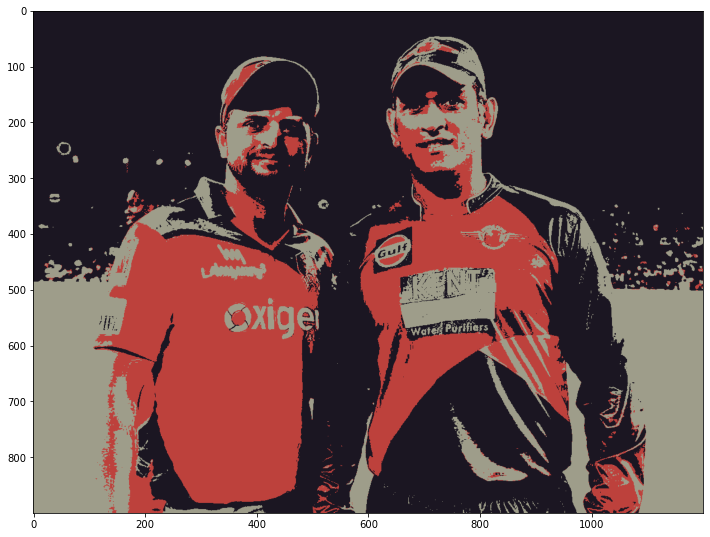

In [151]:
plt.figure(figsize=(12,10))
plt.imshow(image_seg)